In [1]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('TotalEnergies.csv')

In [3]:
data.shape 

(7551, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-02-28,13.8125,14.0625,13.8125,14.0000,3.785994,480800
1,1994-03-01,13.8750,13.8750,13.6875,13.7500,3.718387,231000
2,1994-03-02,13.2500,13.5000,13.1875,13.5000,3.650780,176800
3,1994-03-03,13.4375,13.4375,13.2500,13.4375,3.633877,98200
4,1994-03-04,13.3750,13.5000,13.3750,13.5000,3.650780,88400


In [5]:
data.index 

RangeIndex(start=0, stop=7551, step=1)

In [6]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [7]:
data=data.drop(columns=['Adj Close'],axis=1)

In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace=True)

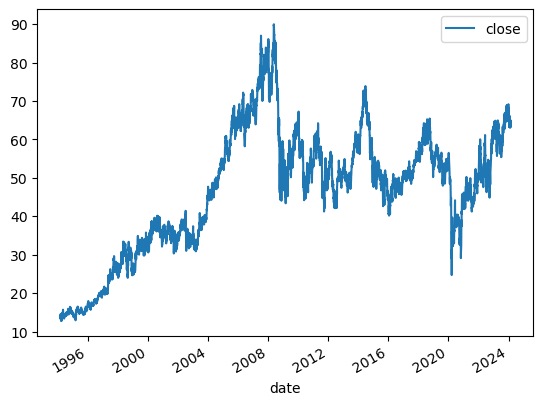

In [10]:
data.plot.line(y='close', use_index=True)
plt.savefig('TotalEnergies.png');

In [11]:
data.describe()

,open,high,low,close,volume
count,7551.000000,7551.000000,7551.000000,7551.000000,7.551000e+03
mean,46.641429,47.004245,46.261206,46.646166,1.667459e+06
std,16.235481,16.335954,16.109003,16.219168,1.437190e+06
min,12.875000,12.937500,12.687500,12.812500,0.000000e+00
25%,35.000000,35.325001,34.685001,34.947501,7.316000e+05
50%,49.340000,49.730000,48.919998,49.310001,1.321000e+06
75%,57.455000,57.939999,57.045000,57.540001,2.199850e+06
max,90.779999,91.339996,89.790001,89.940002,2.705530e+07


In [11]:
data['Tomorrow']=data['close'].shift(-1)

In [12]:
data.head() 

,open,high,low,close,volume,Tomorrow
date,,,,,,
1994-02-28,13.8125,14.0625,13.8125,14.0000,480800,13.7500
1994-03-01,13.8750,13.8750,13.6875,13.7500,231000,13.5000
1994-03-02,13.2500,13.5000,13.1875,13.5000,176800,13.4375
1994-03-03,13.4375,13.4375,13.2500,13.4375,98200,13.5000
1994-03-04,13.3750,13.5000,13.3750,13.5000,88400,13.7500


In [13]:
data['previousday']=data['close'].shift(1)

In [14]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday
date,,,,,,,
1994-02-28,13.8125,14.0625,13.8125,14.0000,480800,13.7500,NaN
1994-03-01,13.8750,13.8750,13.6875,13.7500,231000,13.5000,14.0000
1994-03-02,13.2500,13.5000,13.1875,13.5000,176800,13.4375,13.7500
1994-03-03,13.4375,13.4375,13.2500,13.4375,98200,13.5000,13.5000
1994-03-04,13.3750,13.5000,13.3750,13.5000,88400,13.7500,13.4375


In [15]:
train = data.iloc[:-1000]
test = data.iloc[-1000:]

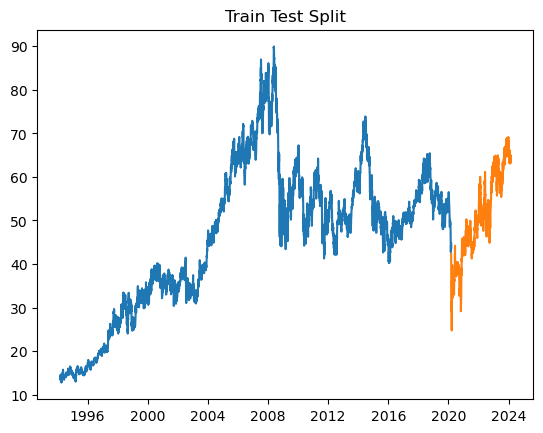

In [16]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [17]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [18]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [19]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 0.24
MAPE: 0.00
minae: 0.00
maxae: 2.06
medae: 0.20

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 0.27
MAPE: 0.01
minae: 0.00
maxae: 2.51
medae: 0.21

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 0.30
MAPE: 0.01
minae: 0.00
maxae: 2.04
medae: 0.24

Learning rate set to 0.358225
0:	learn: 11.2699937	total: 148ms	remaining: 14.6s
1:	learn: 7.6064886	total: 150ms	remaining: 7.34s
2:	learn: 5.0988551	total: 152ms	remaining: 4.91s
3:	learn: 3.4964200	total: 155ms	remaining: 3.72s
4:	learn: 2.4618710	total: 157ms	remaining: 2.99s
5:	learn: 1.8246210	total: 160ms	remaining: 2.51s
6:	learn: 1.4470281	total: 162ms	remaining: 2.16s
7:	learn: 1.2190446	total: 165ms	remaining: 1.89s
8:	learn: 1.1082399	total: 167ms	remaining: 1.69s
9:	learn: 1.0183034	total: 170ms	remaining: 1.52s
10:	learn: 0.9732300	total: 172ms	remaining

#### Retrain the best Model(Extreme Gradient Boosting)

In [20]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [21]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [22]:
#combined_1.plot();
combined_2

,close,0
date,,
2020-03-06,42.310001,42.035314
2020-03-09,34.770000,35.678694
2020-03-10,37.020000,36.329191
2020-03-11,34.509998,35.329123
2020-03-12,29.110001,31.152401
...,...,...
2024-02-20,63.259998,63.537454
2024-02-21,64.089996,63.544908
2024-02-22,64.139999,64.097316


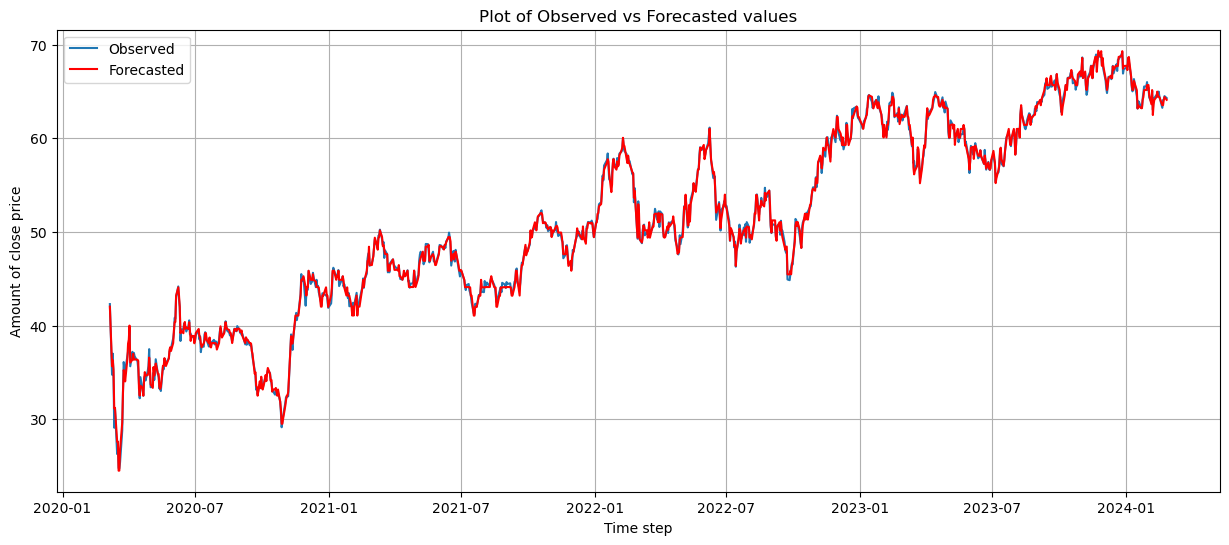

In [23]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [24]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [25]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [26]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [27]:
data['RSI']= computeRSI(data['close'], 14)

In [28]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
1994-02-28,13.8125,14.0625,13.8125,14.0000,480800,13.7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-01,13.8750,13.8750,13.6875,13.7500,231000,13.5000,14.0000,0.990991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-02,13.2500,13.5000,13.1875,13.5000,176800,13.4375,13.7500,0.990826,27.7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-03,13.4375,13.4375,13.2500,13.4375,98200,13.5000,13.5000,0.997680,27.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-04,13.3750,13.5000,13.3750,13.5000,88400,13.7500,13.4375,1.002320,26.9375,0.989918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.shape 

(7551, 19)

In [30]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
1994-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0000,NaN
1994-03-01,0.990991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.7500,NaN
1994-03-02,0.990826,27.7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.5000,NaN
1994-03-03,0.997680,27.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4375,NaN
1994-03-04,1.002320,26.9375,0.989918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.5000,NaN


In [31]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [32]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [33]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [34]:
new_data=new_data.dropna()
new_data.shape 

(6551, 16)

In [35]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
1998-02-12,0.997576,52.46875,0.983039,131.25000,0.988035,1563.09375,1.049606,6120.15625,1.401865,18334.37500,25.71875,0.011057,26.062500,26.109375,18.341752,25.880591
1998-02-13,0.994502,51.56250,0.979307,130.81250,0.978895,1561.81250,1.037281,6125.81250,1.385652,18346.09375,25.43750,-0.004890,25.666667,25.906250,18.348834,25.858977
1998-02-17,1.009130,51.15625,1.000000,129.87500,0.998314,1559.15625,1.055357,6130.81250,1.410233,18357.78125,25.90625,0.008516,25.687500,25.726562,18.356368,25.861283
1998-02-18,1.010740,51.34375,1.022947,129.53125,1.020974,1557.00000,1.077082,6136.84375,1.439832,18370.18750,26.46875,0.020482,25.937500,25.882812,18.364448,25.890915
1998-02-19,0.992866,52.37500,1.006509,129.37500,1.007886,1555.50000,1.060738,6143.62500,1.418461,18383.21875,26.09375,0.010896,26.156250,25.976562,18.372139,25.900810


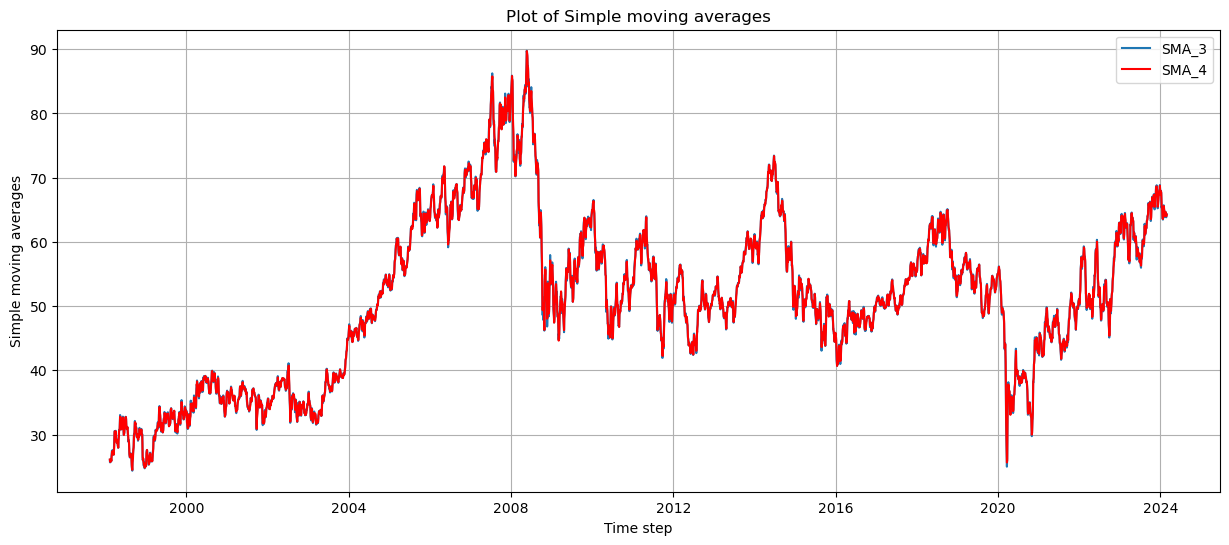

In [36]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

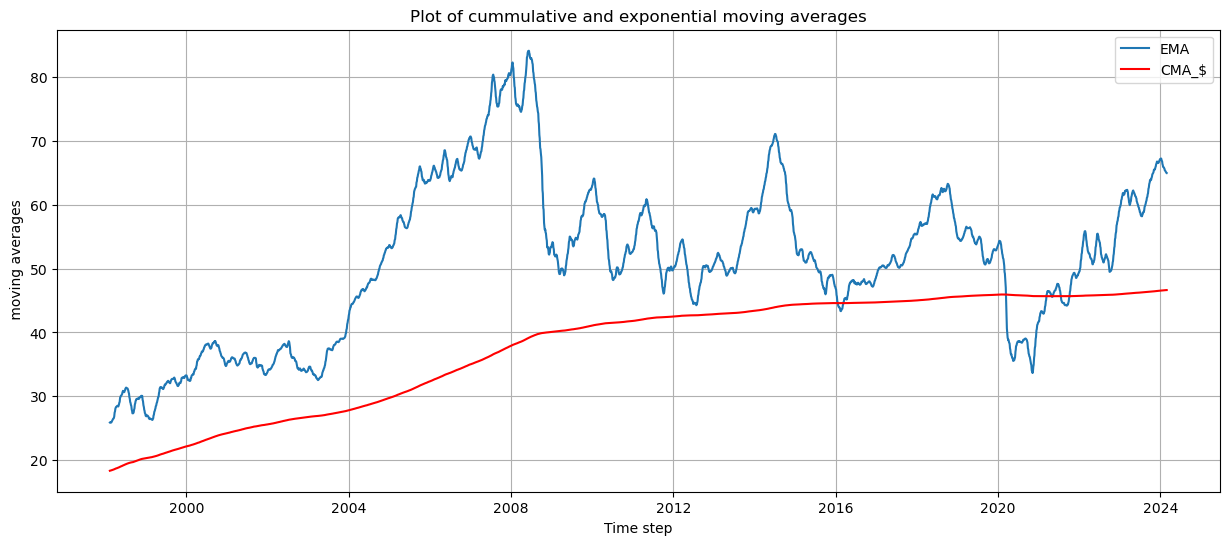

In [37]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

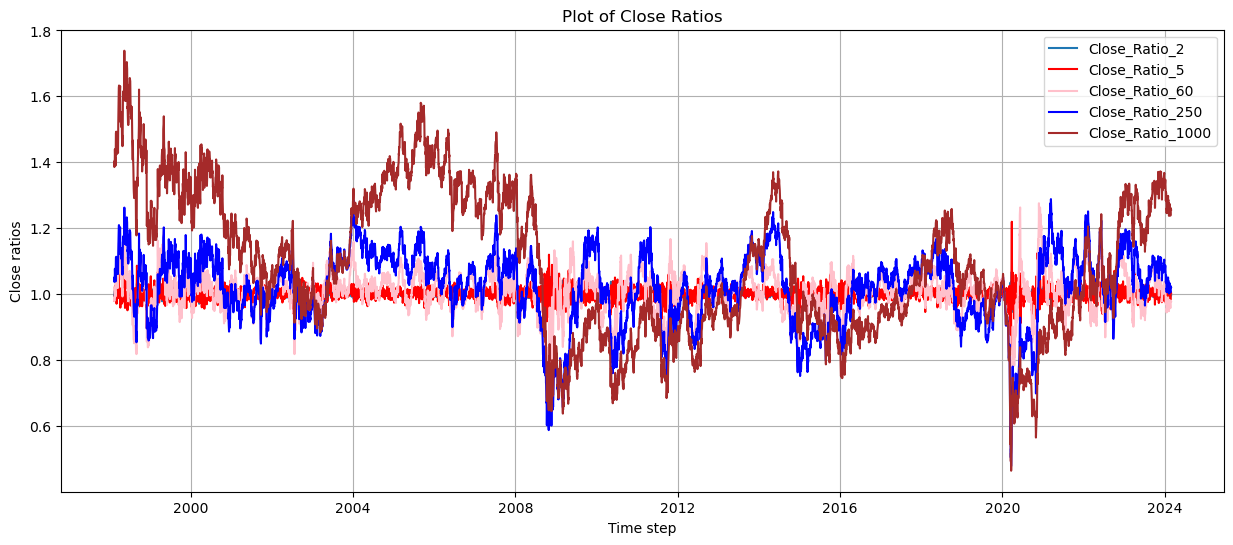

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

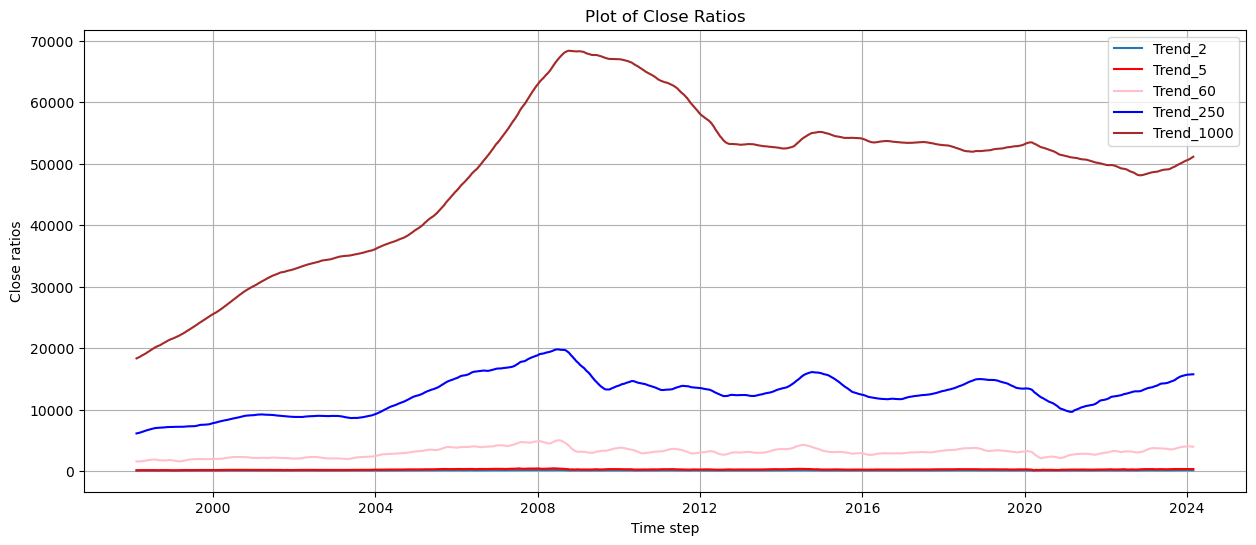

In [39]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [40]:
new_data['RSI']=data['RSI']
new_data['previousday']=data['previousday']

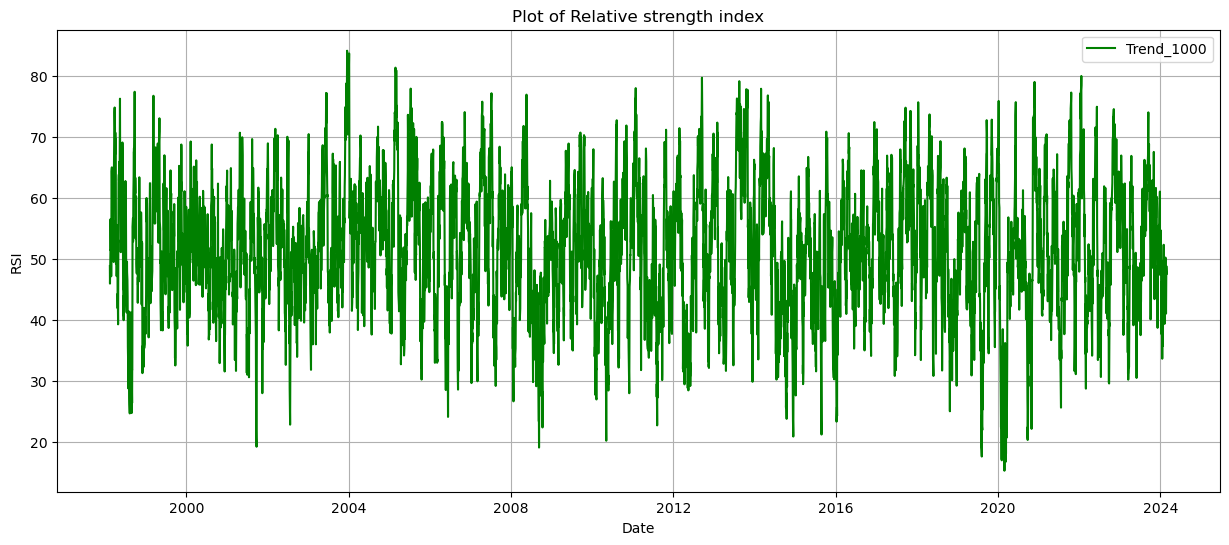

In [41]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

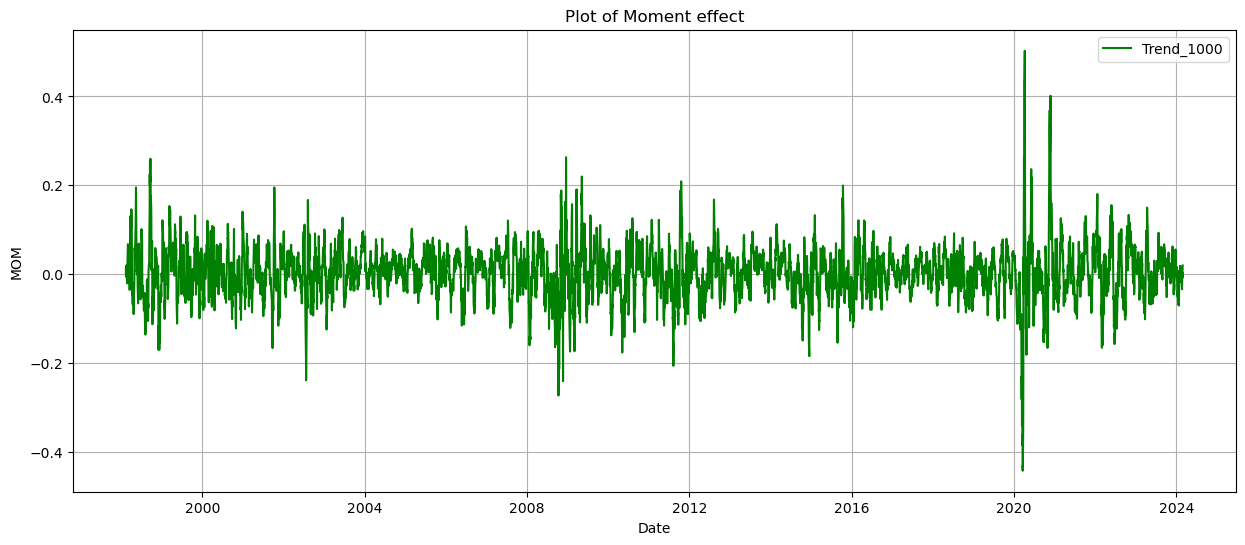

In [42]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [43]:
train = new_data.iloc[:-1000]
test = new_data.iloc[-1000:]

In [44]:
train.shape

(5551, 18)

In [45]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [46]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM', 'previousday'] 

#### Retrain the models on the new predictors

In [47]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 0.44
MAPE: 0.01
minae: 0.00
maxae: 5.59
medae: 0.32

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 0.44
MAPE: 0.01
minae: 0.00
maxae: 4.77
medae: 0.34

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 0.49
MAPE: 0.01
minae: 0.00
maxae: 4.02
medae: 0.40

Learning rate set to 0.348972
0:	learn: 8.8786745	total: 9.07ms	remaining: 898ms
1:	learn: 6.0816871	total: 12.4ms	remaining: 607ms
2:	learn: 4.2385613	total: 15.4ms	remaining: 498ms
3:	learn: 3.0300351	total: 18.8ms	remaining: 452ms
4:	learn: 2.2464059	total: 21.6ms	remaining: 410ms
5:	learn: 1.7438120	total: 24.5ms	remaining: 384ms
6:	learn: 1.4609557	total: 28.8ms	remaining: 383ms
7:	learn: 1.3012298	total: 31.9ms	remaining: 366ms
8:	learn: 1.2117069	total: 35.5ms	remaining: 359ms
9:	learn: 1.1033424	total: 38.4ms	remaining: 345ms
10:	learn: 1.0419700	total: 41.8ms	remaining: 338ms
11:	learn: 1.0148520	tot

#### Improving the model

In [48]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [49]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [50]:
def backtest(new_data, model_2, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [51]:
predictions_2 = backtest(new_data, model_2, predictors)

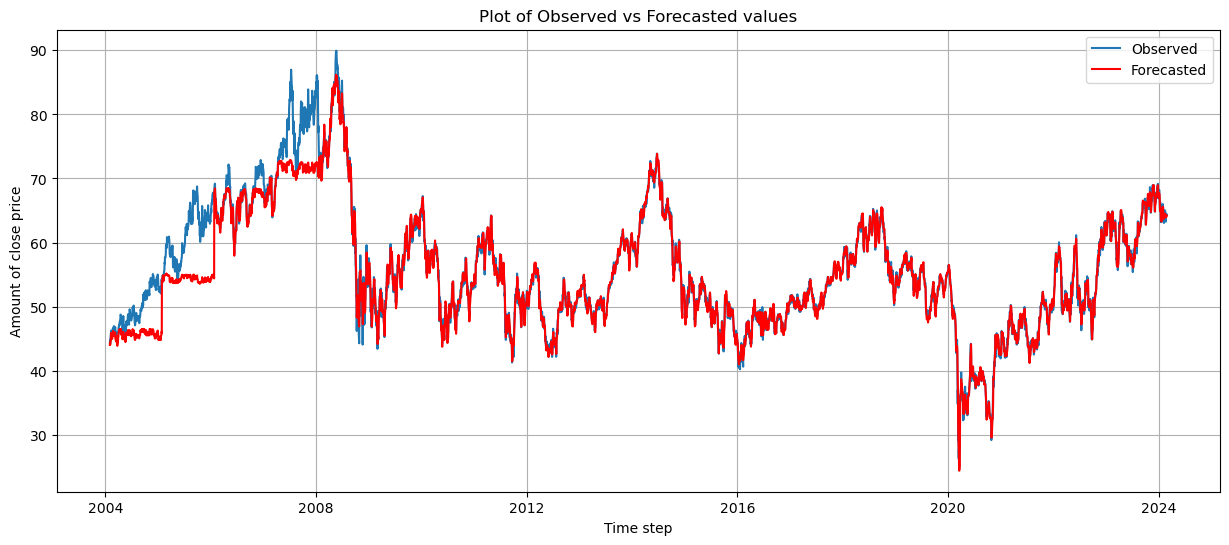

In [52]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [53]:
model_2.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [54]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [55]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.011891473544884444

mean absolute  error is : 0.5307854620560805



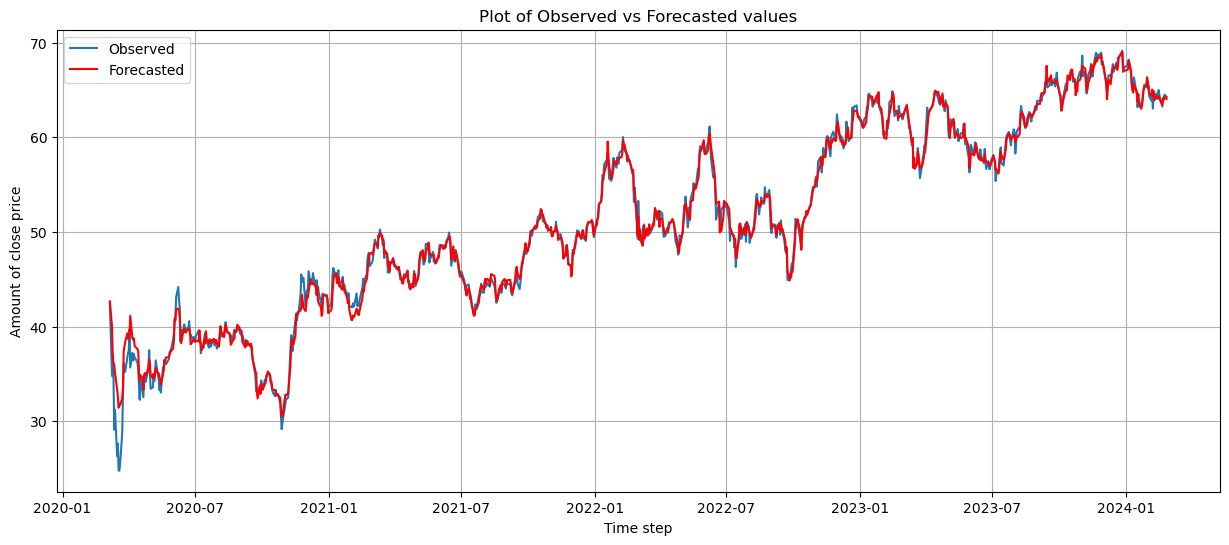

In [56]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [57]:
model = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1, min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [58]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [59]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 0.43780144362409285 
 gradientboost minae: 0.00012267928511278114 
 gradientboost maxae: 4.946532172675155 
 gradientboost medae: 0.33491237704694754 
 gradientboost Mape: 0.009279900381636438 
  

 <-------------------------------------------------->



In [60]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2020-03-06,42.310001,43.245084
2020-03-09,34.770000,39.716532
2020-03-10,37.020000,37.467067
2020-03-11,34.509998,35.209313
2020-03-12,29.110001,33.477990
...,...,...
2024-02-20,63.259998,63.972324
2024-02-21,64.089996,64.092382
2024-02-22,64.139999,63.957896


In [61]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [62]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.009279900381636438

mean absolute  error is : 0.43780144362409285



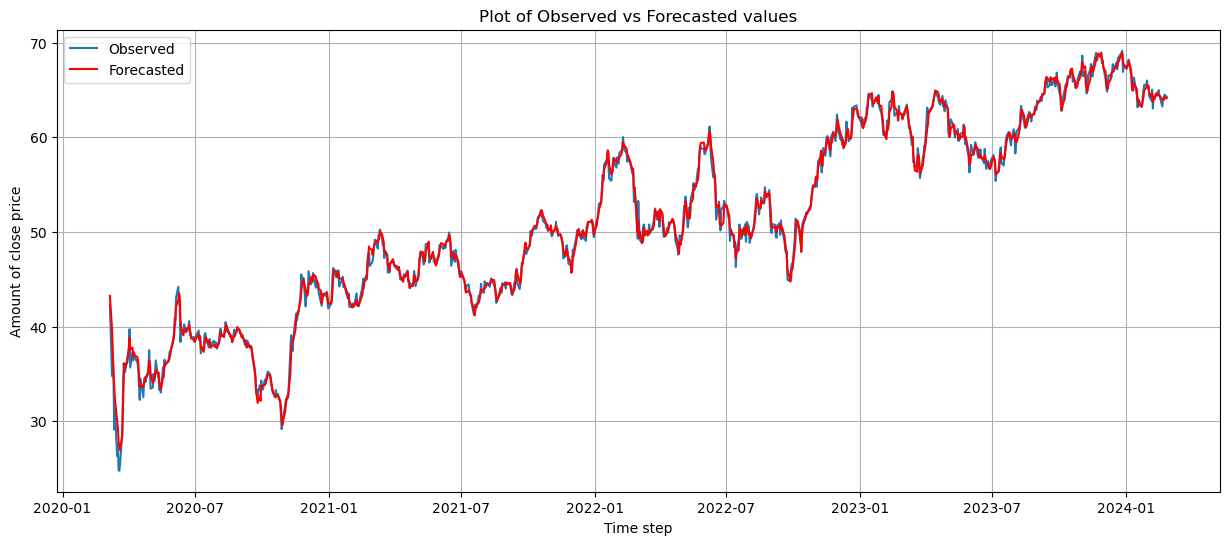

In [63]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [64]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")




#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 0.45972361039999976 
 bagging minae: 2.0000000233721948e-07 
 bagging maxae: 5.378248899999996 
 bagging medae: 0.35350190000000126 
 bagging Mape: 0.009647334086449173 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 0.3839139693000549 
 stacking minae: 0.0013954123062873691 
 stacking maxae: 3.776978766784982 
 stacking medae: 0.28448115854045497 
 stacking mape: 0.008100895303729743 



In [65]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [66]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [67]:
combined_bagg.head()

,close,0
date,,
2020-03-06,42.310001,43.251000
2020-03-09,34.770000,40.148249
2020-03-10,37.020000,37.627875
2020-03-11,34.509998,34.823501
2020-03-12,29.110001,32.802125


In [68]:
combined_stack

,close,0
date,,
2020-03-06,42.310001,43.381987
2020-03-09,34.770000,37.315846
2020-03-10,37.020000,38.862464
2020-03-11,34.509998,33.592711
2020-03-12,29.110001,32.886980
...,...,...
2024-02-20,63.259998,63.964900
2024-02-21,64.089996,64.321611
2024-02-22,64.139999,63.871889


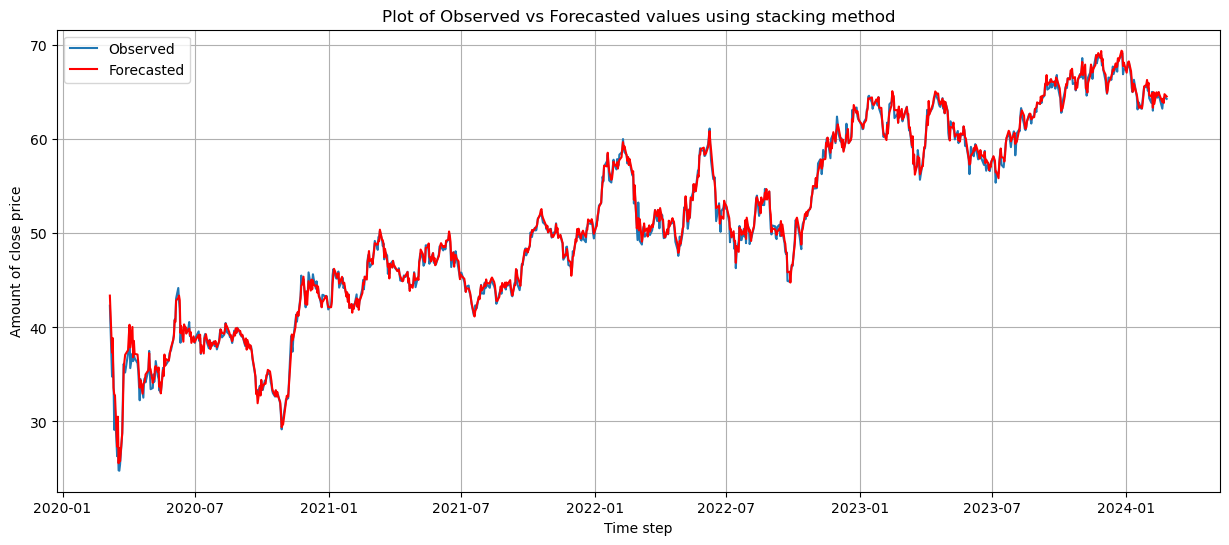

In [69]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

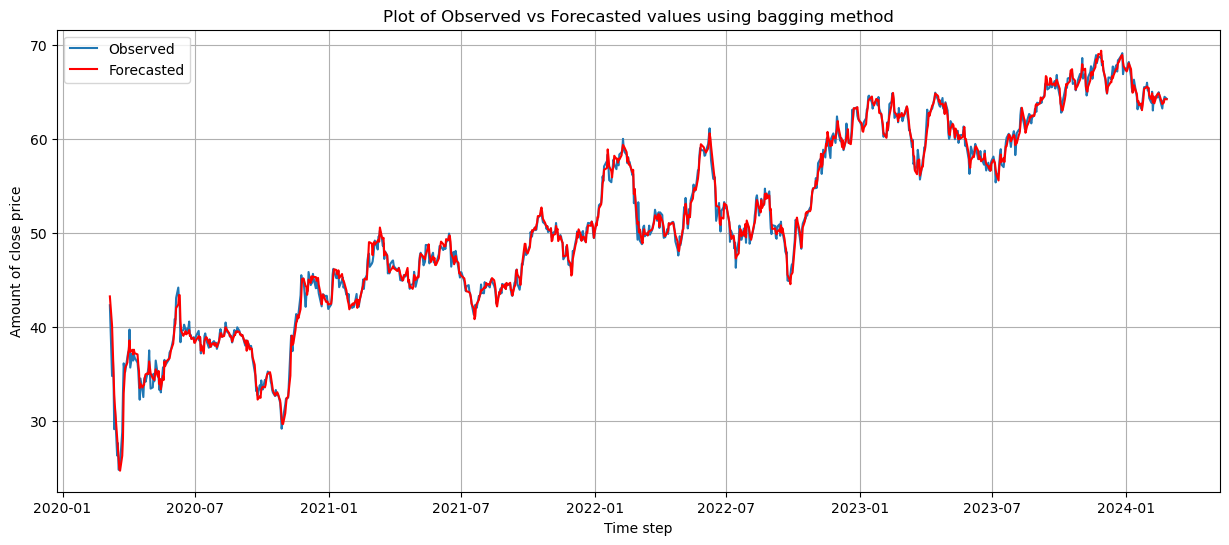

In [70]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

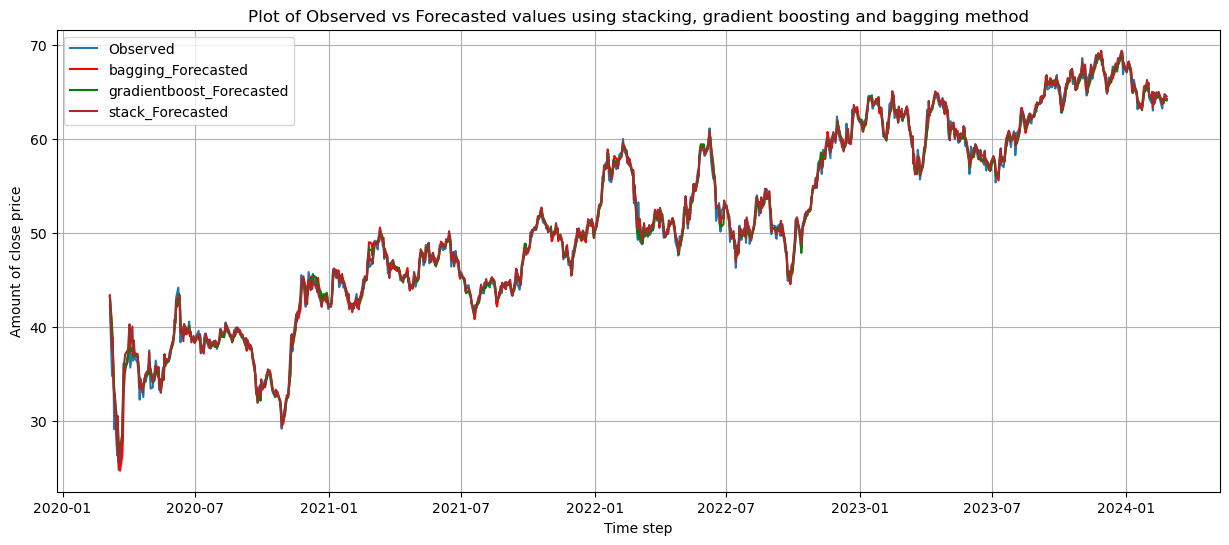

In [71]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined[0], color='green', label='gradientboost_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('TotalEnergiesresult.png')
plt.show()

In [72]:
from prettytable import PrettyTable
import joblib
import os
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg',0.44, 0.01, 0.00, 5.59, 0.32])
task1_result.add_row(['XGboost', 0.44, 0.01, 0.00, 4.77, 0.34])
task1_result.add_row(['GradientBoost', 0.49, 0.01, 0.00, 4.02, 0.40])
task1_result.add_row(['Catboost', 0.53, 0.01, 0.00, 7.02, 0.36])
task1_result.add_row(['Bagging', 0.46, 0.01, 2.00, 5.38, 0.35])
task1_result.add_row(['Stacking', 0.38, 0.01, 5.89, 2.84, 0.29])

print('Result Summary for All Regressors :')
print(task1_result)

Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |     0.44    |     0.01     |      0.0      |      5.59     |      0.32     |
|    XGboost    |     0.44    |     0.01     |      0.0      |      4.77     |      0.34     |
| GradientBoost |     0.49    |     0.01     |      0.0      |      4.02     |      0.4      |
|    Catboost   |     0.53    |     0.01     |      0.0      |      7.02     |      0.36     |
|    Bagging    |     0.46    |     0.01     |      2.0      |      5.38     |      0.35     |
|    Stacking   |     0.38    |     0.01     |      5.89     |      2.84     |      0.29     |
+---------------+-------------+--------------+---------------+---------------+---------------+
